In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**Table of contents**<a id='toc0_'></a>    
- 1. [**Performing Facial Recognition with Deep Learning**](#toc1_)    
  - 1.1. [**Project Context**](#toc1_1_)    
  - 1.2. [**Project Objectives**](#toc1_2_)    
  - 1.3. [**Project Dataset Description**](#toc1_3_)    
  - 1.4. [**Project Analysis Steps To Perform**](#toc1_4_)    
    - 1.4.1. [**Preliminary analysis**](#toc1_4_1_)    
      - 1.4.1.1. [**Import Modules and Set Default Environment Variables**](#toc1_4_1_1_)    
      - 1.4.1.2. [**Look for corrupt files [Optional]**   ](#toc1_4_1_2_)    
      - 1.4.1.3. [**Rename Files [Optional]**    ](#toc1_4_1_3_)    
      - 1.4.1.4. [**Plot Sample Images**](#toc1_4_1_4_)    
      - 1.4.1.5. [**Create a validation framework and split the data into train, test, and validation datasets**](#toc1_4_1_5_)    
      - 1.4.1.6. [**Perform necessary transformations to prepare the data for input to the CNN model**](#toc1_4_1_6_)    
      - 1.4.1.7. [**Thing G**](#toc1_4_1_7_)    
      - 1.4.1.8. [**Thing H**](#toc1_4_1_8_)    
      - 1.4.1.9. [**Thing I**](#toc1_4_1_9_)    
      - 1.4.1.10. [**Thing J**](#toc1_4_1_10_)    
      - 1.4.1.11. [**Thing K**](#toc1_4_1_11_)    
      - 1.4.1.12. [**Thing L**](#toc1_4_1_12_)    
    - 1.4.2. [**Part 2**](#toc1_4_2_)    
      - 1.4.2.1. [**Thing A**](#toc1_4_2_1_)    
        - 1.4.2.1.1. [**Thing A.A**](#toc1_4_2_1_1_)    
        - 1.4.2.1.2. [**A.B**](#toc1_4_2_1_2_)    
        - 1.4.2.1.3. [**Thing A.C**](#toc1_4_2_1_3_)    
        - 1.4.2.1.4. [**Thing A.D**](#toc1_4_2_1_4_)    
    - 1.4.3. [**Part 3**](#toc1_4_3_)    
      - 1.4.3.1. [**Thing A**](#toc1_4_3_1_)    
      - 1.4.3.2. [**Thing B**](#toc1_4_3_2_)    
        - 1.4.3.2.1. [**Thing B.A**](#toc1_4_3_2_1_)    
        - 1.4.3.2.2. [**Thing B.A**](#toc1_4_3_2_2_)    
        - 1.4.3.2.3. [**Thing B.C**](#toc1_4_3_2_3_)    
        - 1.4.3.2.4. [**Thing B.D**](#toc1_4_3_2_4_)    
      - 1.4.3.3. [**Thing C**](#toc1_4_3_3_)    
      - 1.4.3.4. [**Thing D**](#toc1_4_3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Table of Contents

-----

# 1. <a id='toc1_'></a>[**Performing Facial Recognition with Deep Learning**](#toc0_)

-----------------------------
## 1.1. <a id='toc1_1_'></a>[**Project Context**](#toc0_)
-----------------------------

You are working for Face2Gene, an American AI company that has developed a 
healthcare app for doctors. The app utilizes deep learning algorithms to aid in diagnosing 
patients for genetic disorders and their variants. It converts patient photos into de-identified 
mathematical facial descriptors, which are then compared to syndrome-specific computational-
based classifiers to determine similarity. The app provides a prioritized list of syndromes with 
similar morphology and suggests phenotypic traits and genes for feature annotation and 
syndrome prioritization. 
  
Management has given priority to empowering and entrusting the in-house AI team. As a new 
member of the team, your task is to build a baseline model for facial recognition. The goal is to 
further enhance the app's existing features and add more value to the business based on this 
baseline model.

-----------------------------
## 1.2. <a id='toc1_2_'></a>[**Project Objectives**](#toc0_)
-----------------------------

Create a facial recognition tool using a relevant deep learning algorithm, leveraging 
the provided resources.

-----------------------------
## 1.3. <a id='toc1_3_'></a>[**Project Dataset Description**](#toc0_)
-----------------------------

The ORL Database of Faces consists of 400 images from 40 different subjects. 
The images were captured at different times, under varying lighting conditions, with different 
facial expressions (open, closed eyes, smiling, not smiling), and with or without glasses. All the 
images have a dark homogeneous background, and the subjects are positioned upright and 
frontal with some tolerance for side movement. Each image has a size of 92x112 pixels and 256 
grey levels per pixel. 
  
Data can be downloaded from the following link: 
https://www.kaggle.com/datasets/kasikrit/att-database-of-faces

-----------------------------------
## 1.4. <a id='toc1_4_'></a>[**Project Analysis Steps To Perform**](#toc0_)
-----------------------------------

The following steps will guide you in building the model. 
  
1. Import the relevant packages and collect all the necessary dependencies. 
  
2. Upload and import the data. 
  
3. View a few images to get a sense of the data. 
  
4. Create a validation framework and split the data into train, test, and validation datasets. 
  
5. Perform necessary transformations to prepare the data for input to the CNN model. 
  
6. Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully 
connected layer. You can also consider utilizing state-of-the-art architectures using transfer 
learning. 
  
7. Train the model using the prepared data. 
  
8. Plot the results to evaluate the model's performance. 
  
9. Iterate on the model, making adjustments and improvements, until you achieve an accuracy 
above 90%.



### 1.4.1. <a id='toc1_4_1_'></a>[**Preliminary analysis**](#toc0_)

#### 1.4.1.1. <a id='toc1_4_1_1_'></a>[**Import Modules and Set Default Environment Variables**](#toc0_)

In [ ]:
import gc
import math
import multiprocessing
import os
import time
import uuid
import random
import string
import warnings
from dotenv import load_dotenv
from concurrent.futures import ThreadPoolExecutor

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras import backend as K
from keras.applications import (EfficientNetB0, InceptionV3, MobileNetV2, ResNet50V2, VGG16)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (Callback, EarlyStopping, LambdaCallback, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau)
from keras.layers import (BatchNormalization, Dense, Dropout, GlobalAveragePooling2D, Input)
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
from keras.utils import Sequence

**Explanations:**

- This code block imports necessary libraries (`pandas`, `numpy`, `matplotlib`, and `seaborn`) and reads the three CSV files into pandas DataFrames. It then displays the first few rows of each dataset to give an initial view of the data.

**Why It Is Important:**

- Importing and examining the datasets is crucial as it allows us to understand the structure and content of our data. This step helps identify any immediate issues with data formatting or missing values and provides a foundation for all subsequent analyses.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.2. <a id='toc1_4_1_2_'></a>[**Look for corrupt files [Optional]**](#toc0_)    [&#8593;](#toc0_)

In [ ]:
def verify_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif', '.pgm', '.pnm', '.webp')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    img.verify()
                except (IOError, SyntaxError) as e:
                    print(f'Bad file: {file_path}')
                    os.remove(file_path)
                    print(f'Deleted bad file: {file_path}')

# verify_images(f'{DATASET_PATH}/dataset_test')
# verify_images(f'{DATASET_PATH}/structure_dataset')

**Explanations:**

- This code examines the shape, structure, and quality of each dataset. It checks the number of rows and columns, data types of each column, presence of missing values, and existence of duplicate entries.

**Why It Is Important:**

- Understanding the dataset's structure and quality is crucial for data preprocessing and analysis. It helps identify potential issues like missing data or duplicates that need to be addressed before proceeding with the analysis.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.3. <a id='toc1_4_1_3_'></a>[**Rename Files [Optional]**](#toc0_) [&#8593;](#toc0_)

In [ ]:
def random_string(length):
    """Generate a random string of fixed length"""
    letters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(letters) for i in range(length))

def rename_files(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Generate a unique name
            new_name = str(uuid.uuid4())

            # Get the file extension
            file_extension = os.path.splitext(filename)[1]

            # Create the new filename
            new_filename = f"{new_name}.{file_extension}"

            # Full paths
            old_file = os.path.join(root, filename)
            new_file = os.path.join(root, new_filename)

            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed: {filename} -> {new_filename}")

# Uncomment if you want to rename all of the files in the dataset
# directories = [f'{DATASET_PATH}/structures_dataset', f'{DATASET_PATH}/dataset_test']
# for start_directory in directories:
#     rename_files(start_directory)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.4. <a id='toc1_4_1_4_'></a>[**Convert File Type [Optional]**](#toc0_) [&#8593;](#toc0_)

In [50]:
def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    print(f"Error converting {filepath}: {e}")

# Usage
# input_dir = 'att_faces_pgm'  # Your current dataset path with PGM files
# output_dir = 'att_faces'  # New dataset path for PNG files
convert_pgm_to_png(input_dir, output_dir)

#### 1.4.1.4. <a id='toc1_4_1_4_'></a>[**Plot Sample Images**](#toc0_) [&#8593;](#toc0_)

In [ ]:
def plot_sample_images(dataset_path, num_samples=1):
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(20, 4*len(classes)))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))][:num_samples]

        for j, image_name in enumerate(images):
            image_path = os.path.join(class_path, image_name)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

        # Set the class name as the title for the first image in the row
        axes[i, 0].set_title(class_name, fontsize=16, pad=20)

    plt.tight_layout()
    plt.show()

# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH', default='/default/dataset/path')
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')

plot_sample_images(f'{DATASET_PATH}/structures_dataset/')

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.5. <a id='toc1_4_1_5_'></a>[**Create a validation framework and split the data into train, test, and validation datasets**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.6. <a id='toc1_4_1_6_'></a>[**Perform necessary transformations to prepare the data for input to the CNN model**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.7. <a id='toc1_4_1_7_'></a>[**Thing G**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.8. <a id='toc1_4_1_8_'></a>[**Thing H**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.9. <a id='toc1_4_1_9_'></a>[**Thing I**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### 1.4.2. <a id='toc1_4_2_'></a>[**Train Model with Augmentation**](#toc0_) [&#8593;](#toc0_)

In [ ]:
# !pip install python-dotenv

In [42]:
import gc
import sys
import glob
import json
import logging
import math
import os
import random
import traceback
import warnings
import yaml
from collections import Counter

from dotenv import load_dotenv

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
import sklearn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

import keras.backend as K
from keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16
)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPooling2D,
    RandomRotation,
    RandomFlip,
    RandomZoom,
    RandomContrast,
    RandomBrightness,
    RandomTranslation,
    Rescaling
)
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.utils import Sequence
from keras.metrics import Precision, Recall, AUC, Metric
from keras.preprocessing import image

# Import Keras Tuner modules
from keras_tuner import (
    Hyperband, 
    HyperModel, 
    HyperParameters, 
    BayesianOptimization, 
    RandomSearch
)

# Clear any existing TensorFlow session
tf.keras.backend.clear_session()

# Set up the logger
logger = logging.getLogger()

# Remove existing handlers from the logger
if logger.hasHandlers():
    logger.handlers.clear()

# Set up the handler
handler = logging.StreamHandler()

# Set the level for the handler
handler.setLevel(logging.DEBUG)

# Create a formatter (optional but recommended)
formatter = logging.Formatter('%(levelname)s:%(message)s')
handler.setFormatter(formatter)

# Add the handler to the logger
logger.addHandler(handler)

# Set the overall logger level to DEBUG
logger.setLevel(logging.DEBUG)

# Test logging
# logger.debug("This is a debug message")    # Should be displayed
# logger.info("This is an info message")     # Should be displayed

# To ignore warnings
warnings.filterwarnings("ignore")

# Configure Random Seed for Numpy and Tensorflow
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.config.experimental.enable_op_determinism()

# Display the version of tensorflow, sklearn, and the GPU
print(f'Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')
print(f'TensorFlow: {tf.__version__}')
print(f'Keras: {tf.keras.version()}')
print(f'Scikit-learn: {sklearn.__version__}')
gpus = tf.config.list_physical_devices('GPU')
print(f'GPUs: {gpus if gpus else "None"}')
print()

class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision(name='precision')
        self.recall = Recall(name='recall')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Update the precision and recall variables
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Compute the F1 score
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        # Reset the state of the metrics
        self.precision.reset_states()
        self.recall.reset_states()

# Define mappings for architectures and preprocessing functions
ARCHITECTURES = {
    'ResNet50V2': ResNet50V2,
    'VGG16': VGG16,
    'InceptionV3': InceptionV3,
    'MobileNetV2': MobileNetV2,
    'EfficientNetB0': EfficientNetB0
}

PREPROCESSING_FUNCTIONS = {
    'resnet_preprocess': resnet_preprocess,
    'vgg_preprocess': vgg_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'efficientnet_preprocess': efficientnet_preprocess
}

# Define metrics mapping
METRICS = {
    'Precision': Precision(name='precision'),
    'Recall': Recall(name='recall'),
    'AUC': AUC(name='auc'),
    'F1Score': F1Score(name='f1_score')
}

class AccuracyCallback(Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% validation accuracy. Stopping training.")
            print()
            print("--------------------")
            print()
            self.model.stop_training = True

class CustomValidationCallback(Callback):
    def __init__(self, validation_data, validation_steps):
        super().__init__()
        self.validation_data = validation_data
        self.validation_steps = validation_steps

    def on_epoch_end(self, epoch, logs=None):
        val_loss = 0
        val_accuracy = 0
        for x, y in self.validation_data.take(self.validation_steps):
            val_metrics = self.model.test_on_batch(x, y)
            val_loss += val_metrics[0]
            val_accuracy += val_metrics[1]

        val_loss /= self.validation_steps
        val_accuracy /= self.validation_steps

        logs['val_loss'] = val_loss
        logs['val_accuracy'] = val_accuracy
        logging.debug(f"\nEpoch {epoch + 1} - Custom validation:")
        logging.debug(f"Loss: {val_loss:.4f}")
        logging.debug(f"Accuracy: {val_accuracy:.4f}")

class DatasetLogger(Callback):
    def __init__(self, train_dataset, val_dataset):
        super().__init__()
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset

    def on_epoch_begin(self, epoch, logs=None):
        logging.debug(f"\nEpoch {epoch + 1} - Train samples: {tf.data.experimental.cardinality(self.train_dataset)}")
        logging.debug(f"Epoch {epoch + 1} - Val samples: {tf.data.experimental.cardinality(self.val_dataset)}")

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            logging.debug(f"\nEpoch {epoch + 1} - Train accuracy: {logs.get('accuracy', 'N/A'):.4f}")
            logging.debug(f"Epoch {epoch + 1} - Val accuracy: {logs.get('val_accuracy', 'N/A'):.4f}")

class DebugCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        logging.debug(f"\nStarting epoch {epoch + 1}\n")

    def on_batch_begin(self, batch, logs=None):
        if batch % 100 == 0:
            # logging.debug(f"\nStarting batch {batch}\n")
            pass

    def on_epoch_end(self, epoch, logs=None):
        logging.debug(f"\nEnd of epoch {epoch + 1}\n")
        if logs:
            for key, value in logs.items():
                logging.debug(f"{key}: {value}")
        logging.debug("\n--------------------\n")

class DataGenerator:
    def __init__(self, config):
        logging.debug("DataGenerator initialization starting.")
        self.config = config
        self.batch_size = config['data']['batch_size']
        self.target_size = tuple(config['data']['target_size'])
        
        # Determine preprocessing function
        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)
        if use_pretrained_weights:
            self.preprocessing_function = PREPROCESSING_FUNCTIONS[config['data']['preprocessing_function']]
        else:
            # When training from scratch you may choose to use a simple rescaling
            self.preprocessing_function = None  # Or define a custom function
            
        self.augmentation_params = config['augmentation']
        self.pre_split = config['data'].get('pre_split', True)

        logging.debug(f'DG batch_size = {self.batch_size}')
        logging.debug(f'DG target_zie = {self.target_size}')
        logging.debug(f'DG preprocessing_function = {self.preprocessing_function}')
        logging.debug(f'DG augmentation_params = {self.augmentation_params}')
        logging.debug(f'DG pre_split = {self.pre_split}')

        # Create data augmentation and rescaling layers
        self.data_augmentation = self.create_data_augmentation()
        self.rescale_layer = self.create_rescale_layer()

        if self.pre_split:
            logging.debug("DG Calling load_pre_split_data function.")
            self.load_pre_split_data()
        else:
            self.load_and_split_data()

    def load_pre_split_data(self):
        # Paths for pre-split data
        logging.debug("DG LPSD Starting load_pre_split_data function.")
        self.train_path = self.config['data']['train_path']
        logging.debug(f"DG LPSD Train path: {self.train_path}")
        self.test_path = self.config['data']['test_path']
        logging.debug(f"DG LPSD Test path: {self.test_path}")

        # Validate paths
        if not os.path.exists(self.train_path):
            raise FileNotFoundError(f"DG LPSD Training path not found: {self.train_path}")
        if not os.path.exists(self.test_path):
            raise FileNotFoundError(f"DG LPSD Testing path not found: {self.test_path}")

        # Load datasets
        logging.debug("DG LPSD Loading train_dataset datasets")
        self.train_dataset = tf.keras.utils.image_dataset_from_directory(
            self.train_path,
            label_mode='categorical',
            batch_size=None,  # Load as individual samples
            image_size=self.target_size,
            shuffle=True
        )

        logging.debug("DG LPSD Loading test_dataset datasets")  
        self.test_dataset = tf.keras.utils.image_dataset_from_directory(
            self.test_path,
            label_mode='categorical',
            batch_size=None,
            image_size=self.target_size,
            shuffle=False
        )

        train_dataset_unbatched = self.train_dataset
        test_dataset_unbatched = self.test_dataset

        self.class_names = self.train_dataset.class_names

        logging.debug(f"DG LPSD Class names: {self.class_names}")

        # Prepare datasets
        logging.debug("DG LPSD Preparing datasets")
        self.train_dataset = self.prepare_dataset(self.train_dataset, augment=True)
        logging.debug("DG LPSD Train dataset prepared.")
        self.val_dataset = self.prepare_dataset(self.test_dataset, augment=False)
        logging.debug("DG LPSD Val dataset prepared.")
        self.test_dataset = self.val_dataset  # Use the validation dataset for testing if appropriate
        logging.debug("DG LPSD Test dataset prepared.")

        # Compute sample counts
        self.train_sample_count = tf.data.experimental.cardinality(train_dataset_unbatched).numpy()
        self.val_sample_count = tf.data.experimental.cardinality(test_dataset_unbatched).numpy()
        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)
        
        # Compute class counts directly from the dataset's file paths
        self.class_counts = self.count_samples_from_directories(self.train_path, self.class_names)
        
        print(f'DG LPSD Train path: {self.train_path}')
        print(f'DG LPSD Test path: {self.test_path}')
        print(f'DG LPSD Batch size: {self.batch_size}')
        print(f'DG LPSD Target size: {self.target_size}')
        print(f'DG LPSD steps_per_epoch: {self.steps_per_epoch}')
        print(f'DG LPSD validation_steps: {self.validation_steps}')
        print(f'DG LPSD Preprocessing function: {self.preprocessing_function}')
        print(f'DG LPSD Augmentation params: {self.augmentation_params}')
        print(f'DG LPSD Class counts: {self.class_counts}')
        print(f'DG LPSD Training set size: {self.train_sample_count}')
        print(f'DG LPSD Validation set size: {self.val_sample_count}')
        print(f'DG LPSD Testing set size: {self.val_sample_count}')

    def count_samples_from_directories(self, dataset_path, class_names):
        import os
        counts = {}
        for class_name in class_names:
            class_dir = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_dir):
                counts[class_name] = len([
                    fname for fname in os.listdir(class_dir)
                    if os.path.isfile(os.path.join(class_dir, fname))
                ])
            else:
                counts[class_name] = 0
        return counts

    def load_and_split_data(self):
        logging.debug("DG LASD Getting Class Names.")
        self.class_names = [
            d for d in sorted(os.listdir(self.config['data']['dataset_path']))
            if os.path.isdir(os.path.join(self.config['data']['dataset_path'], d))
        ]
        logging.debug(f"DG LASD Class Names: {self.class_names}")
        class_indices = {name: index for index, name in enumerate(self.class_names)}
        logging.debug(f"DG LASD Class Indices: {class_indices}")

        # Collect file paths and labels
        file_paths = []
        labels = []
        for class_name in self.class_names:
            class_dir = os.path.join(self.config['data']['dataset_path'], class_name)
            class_files = glob.glob(os.path.join(class_dir, '*'))
            file_paths.extend(class_files)
            labels.extend([class_indices[class_name]] * len(class_files))

        file_paths = np.array(file_paths)
        labels = np.array(labels)

        # First split: train and temp (val + test)
        logging.debug("DG LASD Splitting data into train and temp sets.")
        train_paths, temp_paths, train_labels, temp_labels = train_test_split(
            file_paths, labels,
            test_size=0.3,
            stratify=labels,
            random_state=42
        )

        # Second split: validation and test
        logging.debug("DG LASD Splitting temp data into val and test sets.")
        val_paths, test_paths, val_labels, test_labels = train_test_split(
            temp_paths, temp_labels,
            test_size=0.5,
            stratify=temp_labels,
            random_state=42
        )

        # Mapping indices back to class names for readability
        index_to_class = {index: name for name, index in class_indices.items()}

        # Training set class distribution
        train_class_counts = Counter(train_labels)
        train_class_counts_named = {index_to_class[k]: v for k, v in train_class_counts.items()}
        logging.info(f"Training class distribution: {train_class_counts_named}")

        # Validation set class distribution
        val_class_counts = Counter(val_labels)
        val_class_counts_named = {index_to_class[k]: v for k, v in val_class_counts.items()}
        logging.info(f"Validation class distribution: {val_class_counts_named}")

        # Test set class distribution
        test_class_counts = Counter(test_labels)
        test_class_counts_named = {index_to_class[k]: v for k, v in test_class_counts.items()}
        logging.info(f"Test class distribution: {test_class_counts_named}")

        # Store the training class counts as an attribute
        self.class_counts = train_class_counts_named

        # Create datasets from file paths and labels
        logging.debug("DG LASD Creating datasets from file paths and labels.")
        train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
        val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
        test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

        # Define the load_image function inside the method
        def load_image(file_path, label):
            # Read the image from file
            image = tf.io.read_file(file_path)
            # Decode the image data (supports JPEG, PNG, BMP, and GIF)
            image = tf.image.decode_image(image, channels=3)
            # Set static shape if possible
            image.set_shape([None, None, 3])
            # Convert image to float32 and resize
            image = tf.image.convert_image_dtype(image, tf.float32)
            # Resize image to target size
            image = tf.image.resize(image, self.target_size)
            # Apply preprocessing function if specified
            if self.preprocessing_function:
                image = self.preprocessing_function(image)
            else: 
                # Default normalization if no preprocessing function is specified
                image = image / 255.0
            
            # One-hot encode the label
            label = tf.one_hot(label, depth=len(self.class_names))
            return image, label

        # Map function to load images from file paths
        logging.debug("DG LASD Mapping load_image function to datasets.")
        train_dataset = train_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        val_dataset = val_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        test_dataset = test_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

        # Prepare datasets
        logging.debug("DG LASD Preparing datasets.")
        self.train_dataset = self.prepare_dataset(train_dataset, augment=True)
        self.val_dataset = self.prepare_dataset(val_dataset, augment=False)
        self.test_dataset = self.prepare_dataset(test_dataset, augment=False)

        # Compute sample counts
        logging.debug("DG LASD Computing sample counts.")
        self.train_sample_count = len(train_paths)
        self.val_sample_count = len(val_paths)
        self.test_sample_count = len(test_paths)
        print(f"DG LASD Training sample size: {self.train_sample_count}")
        print(f"DG LASD Validation sample size: {self.val_sample_count}")
        print(f"DG LASD Test sample size: {self.test_sample_count}")

        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)
        self.test_steps = math.ceil(self.test_sample_count / self.batch_size)
        print(f"DG LASD Steps per epoch: {self.steps_per_epoch}")
        print(f"DG LASD Validation steps: {self.validation_steps}")
        print(f"DG LASD Test steps: {self.test_steps}")

    def split_dataset(self):
        # Calculate dataset size
        dataset_size = tf.data.experimental.cardinality(self.dataset).numpy()

        # Define split sizes
        train_size = int(0.7 * dataset_size)
        val_size = int(0.15 * dataset_size)
        test_size = dataset_size - train_size - val_size

        # Shuffle and split
        self.dataset = self.dataset.shuffle(buffer_size=dataset_size, seed=42)
        train_dataset = self.dataset.take(train_size)
        val_test_dataset = self.dataset.skip(train_size)
        val_dataset = val_test_dataset.take(val_size)
        test_dataset = val_test_dataset.skip(val_size)

        logging.debug(f"DG SD Dataset size: {dataset_size}")
        logging.debug(f"DG SD Training size: {train_size}")
        logging.debug(f"DG SD Validation size: {val_size}")
        logging.debug(f"DG SD Test size: {test_size}")

        return train_dataset, val_dataset, test_dataset

    def prepare_dataset(self, dataset, augment):
        if augment:
            try:
                dataset = dataset.map(self.augment, num_parallel_calls=tf.data.AUTOTUNE)
                dataset = dataset.shuffle(1000).repeat()
            except Exception as e:
                logging.error(f"An error occurred trying to prepare dataset with augment true: {e}")
                logging.debug(traceback.format_exc())
        else:
            dataset = dataset.map(self.normalize_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            dataset = dataset.cache()
        dataset = dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE)
        return dataset

    def get_dataset_size(self, dataset):
        return tf.data.experimental.cardinality(dataset).numpy() * self.batch_size

    def create_data_augmentation(self):
        layers = []
        augmentation_params = self.augmentation_params

        # Apply augmentations based on parameters
        if augmentation_params.get('rotation_range'):
            rotation_range = augmentation_params['rotation_range']
            factor = rotation_range / 360.0  # Convert degrees to fraction of full circle
            # Ensure factor is within [-1.0, 1.0]
            factor = max(min(factor, 1.0), -1.0)
            layers.append(RandomRotation(factor=(-factor, factor)))

        if augmentation_params.get('horizontal_flip'):
            layers.append(RandomFlip(mode='horizontal'))

        if augmentation_params.get('vertical_flip'):
            layers.append(RandomFlip(mode='vertical'))

        if augmentation_params.get('zoom_range'):
            zoom = augmentation_params['zoom_range']
            # RandomZoom expects height_factor and width_factor in [-1.0, 1.0]
            # Ensure zoom is within [0.0, 1.0] to avoid invalid factors
            zoom = max(min(zoom, 1.0), 0.0)
            layers.append(RandomZoom(height_factor=(-zoom, zoom), width_factor=(-zoom, zoom)))

        if augmentation_params.get('width_shift_range') or augmentation_params.get('height_shift_range'):
            width_shift = augmentation_params.get('width_shift_range', 0.0)
            height_shift = augmentation_params.get('height_shift_range', 0.0)
            # RandomTranslation expects height_factor and width_factor in [-1.0, 1.0]
            width_shift = max(min(width_shift, 1.0), -1.0)
            height_shift = max(min(height_shift, 1.0), -1.0)
            layers.append(RandomTranslation(height_factor=height_shift, width_factor=width_shift))

        if augmentation_params.get('brightness_range'):
            brightness = augmentation_params['brightness_range']
            # RandomBrightness expects factor in [0.0, inf), but to avoid extreme brightness, cap it
            brightness = max(brightness, 0.0)
            layers.append(RandomBrightness(factor=brightness))

        if augmentation_params.get('contrast_range'):
            contrast = augmentation_params['contrast_range']
            # RandomContrast expects factor in [0.0, inf), but to avoid extreme contrast, cap it
            contrast = max(contrast, 0.0)
            layers.append(RandomContrast(factor=contrast))
            
        if not layers:
            layers.append(tf.keras.layers.Lambda(lambda x: x))

        data_augmentation = tf.keras.Sequential(layers)
        return data_augmentation

    def create_rescale_layer(self):
        # Define which preprocessing functions expect which input ranges
        preprocess_0_255 = [resnet_preprocess, vgg_preprocess]
        preprocess_0_1 = [efficientnet_preprocess]
        preprocess_minus1_1 = [mobilenet_preprocess, inception_preprocess]

        if self.preprocessing_function in preprocess_0_255:
            # No rescaling needed; images are already in [0, 255]
            return None
        elif self.preprocessing_function in preprocess_0_1:
            # Rescaling needed to bring images to [0, 1]
            return Rescaling(1./255)
        elif self.preprocessing_function in preprocess_minus1_1:
            # Rescaling needed to bring images to [0, 1]; preprocessing function will scale to [-1, 1]
            return Rescaling(1./255)
        else:
            # Default to rescaling to [0, 1]
            return Rescaling(1./255)

    def augment(self, images, labels):
        # Different preprocessing functions expect different ranges of images after augmentation
        # ResNet50V2 and VGG16: Expect images in the range [0, 255] with mean subtraction.
        # InceptionV3 and MobileNetV2: Expect images scaled to [-1, 1].
        # EfficientNetB0: Expects images scaled to [0, 1].
        
        images = tf.cast(images, tf.float32)

        # Apply rescaling if necessary
        if self.rescale_layer:
            images = self.rescale_layer(images)

        # Apply data augmentation
        images = self.data_augmentation(images)

        # Apply preprocessing function
        images = self.preprocessing_function(images)

        return images, labels

    def normalize_and_preprocess(self, images, labels):
        images = tf.cast(images, tf.float32)

        # Apply rescaling if necessary
        if self.rescale_layer:
            images = self.rescale_layer(images)

        # Apply preprocessing function
        images = self.preprocessing_function(images)

        return images, labels

    def create_datasets(self):
        return None

class MyHyperModel(HyperModel):
    def __init__(self, config, num_classes, best_hyperparameters=None):
        """
        Initializes the HyperModel.

        Args:
            config (dict): Configuration dictionary.
            num_classes (int): Number of output classes.
            best_hyperparameters (HyperParameters, optional): Best hyperparameters from tuning.
        """
        self.config = config
        self.num_classes = num_classes
        self.best_hyperparameters = best_hyperparameters

    def build(self, hp):
        """
        Builds the model based on whether to use pre-trained weights or not.

        Args:
            hp (HyperParameters): Hyperparameters for tuning.

        Returns:
            keras.Model: Compiled Keras model.
        """
        # If hp is None, use best_hyperparameters or default fixed hyperparameters
        if hp is None:
            if self.best_hyperparameters is not None:
                hp = self.best_hyperparameters
            else:
                # Create a default HyperParameters object with fixed values from config
                from keras_tuner import HyperParameters
                hp = HyperParameters()
                
                # Pre-trained model hyperparameters
                hp.Fixed('dense_units', self.config['hyperparameters']['dense_units']['default'])
                hp.Fixed('dropout_rate', self.config['hyperparameters']['dropout_rate']['default'])
                hp.Fixed('learning_rate', self.config['hyperparameters']['learning_rate']['default'])
                hp.Fixed('optimizer', self.config['hyperparameters']['optimizer']['default'])
                
                # Scratch model hyperparameters
                hp.Fixed('dense_units_scratch', self.config['hyperparameters']['dense_units_scratch']['default'])
                hp.Fixed('dropout_rate_scratch', self.config['hyperparameters']['dropout_rate_scratch']['default'])
                hp.Fixed('learning_rate_scratch', self.config['hyperparameters']['learning_rate_scratch']['default'])
                hp.Fixed('optimizer_scratch', self.config['hyperparameters']['optimizer_scratch']['default'])

        model_config = self.config['model']
        use_pretrained_weights = model_config.get('use_pretrained_weights', True)

        if use_pretrained_weights:
            # **Using Pre-trained Architecture**
            architecture_name = model_config['name']
            architecture = ARCHITECTURES[architecture_name]
            input_shape = tuple(model_config['input_shape'])
            base_model_weights = 'imagenet' if use_pretrained_weights else None
            
            print(f"Building model with pre-trained model {architecture_name} with input shape {input_shape} and base model weights {base_model_weights}")
            print()

            # Load the base model with or without pre-trained weights
            base_model = architecture(
                weights=base_model_weights,
                include_top=False,
                input_shape=input_shape,
                name='base_model'  # Assign a name for easy access
            )

            # Freeze the base model initially
            base_model.trainable = False

            # Create the classification head
            inputs = Input(shape=input_shape)
            x = base_model(inputs, training=False)
            x = Flatten()(x)

            # Integrate hyperparameters for dense units and dropout rate
            dense_units = hp.Int(
                'dense_units',
                min_value=self.config['hyperparameters']['dense_units']['min'],
                max_value=self.config['hyperparameters']['dense_units']['max'],
                step=self.config['hyperparameters']['dense_units']['step'],
                default=self.config['hyperparameters']['dense_units']['default']
            )
            dropout_rate = hp.Float(
                'dropout_rate',
                min_value=self.config['hyperparameters']['dropout_rate']['min'],
                max_value=self.config['hyperparameters']['dropout_rate']['max'],
                step=self.config['hyperparameters']['dropout_rate']['step'],
                default=self.config['hyperparameters']['dropout_rate']['default']
            )

            x = Dense(dense_units, activation='relu')(x)
            x = Dropout(dropout_rate)(x)
            x = Dense(dense_units // 2, activation='relu')(x)
            x = Dropout(dropout_rate)(x)
            output = Dense(self.num_classes, activation='softmax')(x)

            model = Model(inputs=inputs, outputs=output)

            # Compile the model with hyperparameter-defined optimizer
            learning_rate = hp.Float(
                'learning_rate',
                min_value=self.config['hyperparameters']['learning_rate']['min'],
                max_value=self.config['hyperparameters']['learning_rate']['max'],
                sampling='log',
                default=self.config['hyperparameters']['learning_rate']['default']
            )
            optimizer_choice = hp.Choice(
                'optimizer',
                values=self.config['hyperparameters']['optimizer']['choices'],
                default=self.config['hyperparameters']['optimizer']['default']
            )

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=learning_rate)
            else:
                optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

            metrics = ['accuracy'] + [METRICS[metric] for metric in self.config['model']['additional_metrics']]

            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=metrics
            )

            return model

        else:
            # **Building Custom Model from Scratch**
            print("Building model from scratch.")
            print()
            # Define a Sequential model similar to build_model function
            model = Sequential()
            model.add(Input(shape=tuple(self.config['model']['input_shape'])))

            # Hyperparameters for Conv2D layers
            for i in range(1, 4):  # Assuming 3 Conv2D layers
                filters = hp.Int(
                    f'conv_{i}_filters_scratch',
                    min_value=32,
                    max_value=256,
                    step=32,
                    default=64
                )
                kernel_size = hp.Choice(
                    f'conv_{i}_kernel_size_scratch',
                    values=[3, 5],
                    default=3
                )
                model.add(Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation='relu'))
                model.add(MaxPooling2D((2, 2)))

            model.add(Flatten())

            # Hyperparameters for Dense layers
            dense_units = hp.Int(
                'dense_units_scratch',
                min_value=self.config['hyperparameters']['dense_units_scratch']['min'],
                max_value=self.config['hyperparameters']['dense_units_scratch']['max'],
                step=self.config['hyperparameters']['dense_units_scratch']['step'],
                default=self.config['hyperparameters']['dense_units_scratch']['default']
            )
            dropout_rate = hp.Float(
                'dropout_rate_scratch',
                min_value=self.config['hyperparameters']['dropout_rate_scratch']['min'],
                max_value=self.config['hyperparameters']['dropout_rate_scratch']['max'],
                step=self.config['hyperparameters']['dropout_rate_scratch']['step'],
                default=self.config['hyperparameters']['dropout_rate_scratch']['default']
            )

            model.add(Dense(dense_units, activation='relu'))
            model.add(Dropout(dropout_rate))
            model.add(Dense(dense_units // 2, activation='relu'))
            model.add(Dropout(dropout_rate))
            model.add(Dense(self.num_classes, activation='softmax'))

            # Compile the model with hyperparameter-defined optimizer
            learning_rate = hp.Float(
                'learning_rate_scratch',
                min_value=self.config['hyperparameters']['learning_rate_scratch']['min'],
                max_value=self.config['hyperparameters']['learning_rate_scratch']['max'],
                sampling='log',
                default=self.config['hyperparameters']['learning_rate_scratch']['default']
            )
            optimizer_choice = hp.Choice(
                'optimizer_scratch',
                values=self.config['hyperparameters']['optimizer_scratch']['choices'],
                default=self.config['hyperparameters']['optimizer_scratch']['default']
            )

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=learning_rate)
            else:
                optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

            metrics = ['accuracy'] + [METRICS[metric] for metric in self.config['model']['additional_metrics']]

            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=metrics
            )

            return model

def setup_gpu(gpu_config):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Log the number of GPUs available
            logging.debug(f"GPU setup complete. Found {len(gpus)} GPU(s).")

            # Optionally, you can log more details about each GPU
            for i, gpu in enumerate(gpus):
                logging.debug(f"GPU {i}: {gpu}")

        except RuntimeError as e:
            logging.error(f"GPU setup failed: {e}")
    else:
        logging.warning("No GPUs found. The model will run on CPU.")

def load_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

def setup_datasets(config):
    try:
        data_generator = DataGenerator(config)
        logging.debug("DataGenerator initialized successfully.")
        train_dataset, test_dataset, steps_per_epoch, validation_steps = data_generator.get_data_generators()
        class_names = data_generator.class_names  # Use class names from data generator
        logging.debug(f"Class names: {class_names}")

        return train_dataset, test_dataset, steps_per_epoch, validation_steps, class_names
    except Exception as e:
        logging.error(f"Dataset setup failed: {e}")
        raise

def get_callbacks(config, train_dataset, test_dataset, validation_steps, for_tuning=False):
    """
    Returns a list of callbacks based on the configuration.

    Args:
        config (dict): Configuration dictionary.
        train_dataset (tf.data.Dataset): Training dataset.
        test_dataset (tf.data.Dataset): Testing dataset.
        validation_steps (int): Number of validation steps.
        for_tuning (bool): Flag indicating if it's for hyperparameter tuning.

    Returns:
        list: List of Keras callbacks.
    """
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=config['training']['patience'],
            restore_best_weights=True
        ),
        ModelCheckpoint(
            filepath=config['training']['model_checkpoint_path'],
            save_best_only=True
        )
    ]
    
    # Incorporate ReduceLROnPlateau if specified in config
    reduce_lr_config = config.get('reduce_lr_on_plateau', None)
    if reduce_lr_config:
        reduce_lr = ReduceLROnPlateau(
            monitor=reduce_lr_config.get('monitor', 'val_loss'),
            factor=reduce_lr_config.get('factor', 0.5),
            patience=reduce_lr_config.get('patience', 5),
            min_lr=reduce_lr_config.get('min_lr', 1e-6),
            verbose=reduce_lr_config.get('verbose', 1)
        )
        callbacks.append(reduce_lr)
    
    if not for_tuning:
        # Include custom callbacks only when not tuning
        callbacks.extend([
            AccuracyCallback(target_accuracy=config['training']['target_accuracy']),
            CustomValidationCallback(test_dataset, validation_steps),
            DebugCallback(),
            DatasetLogger(train_dataset, test_dataset)
        ])
    
    return callbacks

def compute_class_weights_from_counts(class_counts, class_names):
    total_samples = sum(class_counts.values())
    class_weight_dict = {}
    for idx, class_name in enumerate(class_names):
        count = class_counts.get(class_name, 0)
        if count > 0:
            class_weight_dict[idx] = total_samples / (len(class_counts) * count)
        else:
            class_weight_dict[idx] = 0.0  # Handle classes with zero samples
    return class_weight_dict

def save_best_hyperparameters(best_hps, filepath='best_hyperparameters.json'):
    with open(filepath, 'w') as f:
        json.dump(best_hps.values, f)

def load_best_hyperparameters(filepath='best_hyperparameters.json'):
    with open(filepath, 'r') as f:
        hps_dict = json.load(f)
    hp = HyperParameters()
    for key, value in hps_dict.items():
        hp.Fixed(key, value)
    return hp

def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    print(f"Error converting {filepath}: {e}")

def main(config_path):
    """
    The main function to orchestrate data loading, model building, training, and evaluation.

    Args:
        config_path (str): Path to the configuration YAML file.
    """
    # Load the configuration
    config = load_config(config_path)
    logging.debug(f"Loaded configuration: {config}")
    performance_tuning = config.get('tuning', {}).get('perform_tuning', True)
    logging.debug(f"Perform tuning: {performance_tuning}")

    # Set up GPU if available
    setup_gpu(config.get('gpu', {}))
    logging.debug("Completed GPU setup.")

    # Load environment variables
    try:
        from google.colab import drive
        # drive.mount('/content/drive')
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
        logging.debug("Running in Colab environment")
    except ImportError:
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
        logging.debug("Running in local environment")

    # Update the dataset paths based on whether the data is pre-split or not
    pre_split = config['data'].get('pre_split', True)
    if pre_split:
        # For pre-split data
        train_path = os.path.join(DATASET_PATH, config['data']['train_dir'])
        test_path = os.path.join(DATASET_PATH, config['data']['test_dir'])
        config['data']['train_path'] = train_path
        config['data']['test_path'] = test_path
        logging.debug(f"Train path: {train_path}")
        logging.debug(f"Test path: {test_path}")
    else:
        # For single directory data
        dataset_path = os.path.join(DATASET_PATH, config['data']['dataset_dir'])
        config['data']['dataset_path'] = dataset_path
        logging.debug(f"Dataset path: {dataset_path}")

    try:
        # Initialize DataGenerator
        data_generator = DataGenerator(config)
        logging.debug("DataGenerator initialized successfully.")
        train_dataset = data_generator.train_dataset
        val_dataset = data_generator.val_dataset
        test_dataset = data_generator.test_dataset
        class_names = data_generator.class_names
        logging.debug(f"Class names: {class_names}")
        steps_per_epoch = data_generator.steps_per_epoch
        validation_steps = data_generator.validation_steps

        num_classes = len(class_names)

        # Compute class weights using training data
        logging.debug("Main Function Counting Classes and Computing Weights")
        class_counts = data_generator.class_counts
        logging.debug(f"Class counts: {class_counts}")
        class_weight_dict = compute_class_weights_from_counts(class_counts, class_names)
        logging.debug(f"Computed class weights: {class_weight_dict}")

        # Retrieve training parameters
        initial_epochs = config['training'].get('initial_epochs', 10)
        fine_tune_epochs = config['training'].get('fine_tune_epochs', 0)
        total_epochs = initial_epochs + fine_tune_epochs

        # Check if using pre-trained weights
        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)

        if performance_tuning:
            # Instantiate the hypermodel
            hypermodel = MyHyperModel(config, num_classes)
            logging.debug("HyperModel instantiated successfully.")

            # Get callbacks for tuning (only deepcopyable ones)
            tuning_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=True)

            # Set up the tuner
            tuner = RandomSearch(
                hypermodel,
                objective='val_accuracy',
                max_trials=config['tuner']['max_trials'],
                executions_per_trial=config['tuner']['executions_per_trial'],
                directory='hyperparameter_tuning',
                project_name='keras_tuner_project'
            )
            logging.debug("Keras Tuner initialized successfully.")

            # Run the hyperparameter search
            tuner.search(
                train_dataset,
                epochs=initial_epochs,
                validation_data=val_dataset,
                callbacks=tuning_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            # Get the optimal hyperparameters
            best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

            logging.debug(f"""
            The hyperparameter search is complete.
            Best learning rate: {best_hps.get('learning_rate')}
            Best dense units: {best_hps.get('dense_units')}
            Best dropout rate: {best_hps.get('dropout_rate')}
            Best optimizer: {best_hps.get('optimizer')}
            """)
            
            save_best_hyperparameters(best_hps)
            logging.debug("Best hyperparameters saved to file.")

            # Build the best model
            model = tuner.hypermodel.build(best_hps)
            logging.debug("Best model built with optimal hyperparameters.")
        else:
            # Load the best hyperparameters from file
            best_hps = load_best_hyperparameters()
            logging.debug("Loaded best hyperparameters from file.")

            if best_hps is None:
                logging.error("Best hyperparameters could not be loaded. Ensure they are saved correctly.")
                raise ValueError("Best hyperparameters are not available.")

            # Instantiate the hypermodel with best hyperparameters
            hypermodel = MyHyperModel(config, num_classes, best_hyperparameters=best_hps)
            model = hypermodel.build(hp=None)  # hp is None, so it uses best_hyperparameters
            print(f"Model built with loaded hyperparameters: {best_hps}")

        # Get all callbacks including custom ones for final training
        final_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=False)

        # **Initial Training Phase**
        history = model.fit(
            train_dataset,
            epochs=initial_epochs,
            validation_data=val_dataset,
            callbacks=final_callbacks,
            class_weight=class_weight_dict,
            steps_per_epoch=steps_per_epoch
        )

        logging.debug("Initial training completed.")

        # **Fine-Tuning Phase**
        if use_pretrained_weights and fine_tune_epochs > 0:
            logging.debug("Starting fine-tuning phase.")

            # Unfreeze the base model
            # Ensure that the base model was named 'base_model' in MyHyperModel
            try:
                base_model = model.get_layer('base_model')
            except ValueError:
                # If not found, iterate through layers to find the base model
                base_model = None
                for layer in model.layers:
                    if isinstance(layer, Model):
                        base_model = layer
                        break
                if base_model is None:
                    raise ValueError("Base model layer not found for fine-tuning.")

            base_model.trainable = True

            # Recompile the model with a lower learning rate
            if use_pretrained_weights:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['training'].get('fine_tune_learning_rate', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['optimizer']['default']
                    fine_tune_learning_rate = float(config['training'].get('fine_tune_learning_rate', 1e-5))
            else:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['training'].get('fine_tune_learning_rate_scratch', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['optimizer_scratch']['default']
                    fine_tune_learning_rate = float(config['training'].get('fine_tune_learning_rate_scratch', 1e-5))

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=fine_tune_learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=fine_tune_learning_rate)
            else:
                optimizer = Adam(learning_rate=fine_tune_learning_rate)  # Default to Adam

            # Recompile the model
            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]
            )

            logging.debug("Model recompiled for fine-tuning.")

            # Continue training
            history_fine = model.fit(
                train_dataset,
                epochs=total_epochs,
                initial_epoch=initial_epochs,
                validation_data=val_dataset,
                callbacks=final_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            logging.debug("Fine-tuning completed.")

        # Evaluate the model
        logging.debug("Final evaluation:")
        final_evaluation = model.evaluate(test_dataset)
        logging.debug(f"Final evaluation metrics: {final_evaluation}")

        # Save the trained model
        model.save('final_model.h5')
        logging.debug("Model saved successfully.")

        return history, model, class_names, config['data']['target_size'], config['data']['preprocessing_function'], config['model']['name']

    except Exception as e:
        logging.error(f"An error occurred: {e}")
        logging.debug(traceback.format_exc())

        return None, None, None, None, None, None



Python: 3.12.6
TensorFlow: 2.17.0
Keras: 3.5.0
Scikit-learn: 1.5.2
GPUs: None



In [43]:
history, history_fine, model, class_names, target_size, preprocessing_function, ptm_name = main('config.yaml')

DEBUG:Loaded configuration: {'pretrain_model_eval': False, 'model': {'use_pretained_weights': True, 'name': 'ResNet50V2', 'input_shape': [128, 128, 3], 'initial_learning_rate': 0.001, 'decay_steps': 100, 'decay_rate': 0.96, 'dense_units': 512, 'dropout_rate': 0.5, 'additional_metrics': ['Precision', 'Recall', 'AUC', 'F1Score']}, 'augmentation': {'rotation_range': 5, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 'vertical_flip': False, 'zoom_range': 0.2, 'brightness_range': 0.8}, 'data': {'pre_split': True, 'dataset_path': 'dataset', 'dataset_dir': 'att_faces', 'train_dir': 'train_dataset', 'test_dir': 'test_dataset', 'validation_dir': 'validation_dataset', 'batch_size': 32, 'target_size': [128, 128], 'preprocessing_function': 'resnet_preprocess'}, 'tuning': {'perform_tuning': False}, 'training': {'initial_epochs': 2, 'fine_tune_epochs': 10, 'fine_tune_learning_rate': '1e-5', 'patience': 5, 'target_accuracy': 0.99, 'find_lr': False, 'model_checkpoint_path

Found 10235 files belonging to 10 classes.


DEBUG:DG LPSD Loading test_dataset datasets


Found 1474 files belonging to 10 classes.


DEBUG:DG LPSD Class names: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
DEBUG:DG LPSD Preparing datasets
DEBUG:DG LPSD Train dataset prepared.
DEBUG:DG LPSD Val dataset prepared.
DEBUG:DG LPSD Test dataset prepared.
DEBUG:DataGenerator initialized successfully.
DEBUG:Class names: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
DEBUG:Main Function Counting Classes and Computing Weights
DEBUG:Class counts: {'altar': 829, 'apse': 514, 'bell_tower': 1059, 'column': 1919, 'dome(inner)': 616, 'dome(outer)': 1177, 'flying_buttress': 407, 'gargoyle': 1571, 'stained_glass': 1033, 'vault': 1110}
DEBUG:Computed class weights: {0: 1.2346200241254524, 1: 1.9912451361867705, 2: 0.9664778092540132, 3: 0.5333507034914018, 4: 1.661525974025974, 5: 0.8695836873406967, 6: 2.5147420147420148, 7: 0.6514958625079568, 8: 0.9908034849951597, 9: 0.

DG LPSD Train path: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/train_dataset
DG LPSD Test path: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/test_dataset
DG LPSD Batch size: 32
DG LPSD Target size: (128, 128)
DG LPSD steps_per_epoch: 320
DG LPSD validation_steps: 47
DG LPSD Preprocessing function: <function preprocess_input at 0x16cda0b80>
DG LPSD Augmentation params: {'rotation_range': 5, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 'vertical_flip': False, 'zoom_range': 0.2, 'brightness_range': 0.8}
DG LPSD Class counts: {'altar': 829, 'apse': 514, 'bell_tower': 1059, 'column': 1919, 'dome(inner)': 616, 'dome(outer)': 1177, 'flying_buttress': 407, 'gargoyle': 1571, 'stained_glass': 1033, 'vault': 1110}
DG LPSD Training set size: 10235
DG LPSD Validation set size: 1474
DG LPSD Testing set size: 1474
Building model with pre-trained model ResNet50V2 with input shape (128, 

DEBUG:
Starting epoch 1

DEBUG:
Epoch 1 - Train samples: -1
DEBUG:Epoch 1 - Val samples: 47


Model built with loaded hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x956767620>
Epoch 1/2
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.2880 - auc: 0.6969 - f1_score: 0.2351 - loss: 2.3168 - precision: 0.4283 - recall: 0.1626

DEBUG:
Epoch 1 - Custom validation:
DEBUG:Loss: 0.6739
DEBUG:Accuracy: 0.8083
DEBUG:
End of epoch 1

DEBUG:accuracy: 0.4419921934604645
DEBUG:auc: 0.8230413794517517
DEBUG:f1_score: 0.4029155373573303
DEBUG:loss: 1.720815658569336
DEBUG:precision: 0.6521739363670349
DEBUG:recall: 0.29150390625
DEBUG:val_accuracy: 0.8082509015468841
DEBUG:val_auc: 0.9715503454208374
DEBUG:val_f1_score: 0.7932177782058716
DEBUG:val_loss: 0.6738812948795075
DEBUG:val_precision: 0.8684422969818115
DEBUG:val_recall: 0.7299864292144775
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 1 - Train accuracy: 0.4420
DEBUG:Epoch 1 - Val accuracy: 0.8083


320/320 ━━━━━━━━━━━━━━━━━━━━ 170s 518ms/step - accuracy: 0.2885 - auc: 0.6973 - f1_score: 0.2356 - loss: 2.3150 - precision: 0.4290 - recall: 0.1630 - val_accuracy: 0.8083 - val_auc: 0.9716 - val_f1_score: 0.7932 - val_loss: 0.6739 - val_precision: 0.8684 - val_recall: 0.7300 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 2

DEBUG:
Epoch 2 - Train samples: -1
DEBUG:Epoch 2 - Val samples: 47


Epoch 2/2
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6566 - auc: 0.9360 - f1_score: 0.6520 - loss: 1.0457 - precision: 0.8059 - recall: 0.5478

DEBUG:
Epoch 2 - Custom validation:
DEBUG:Loss: 0.5068
DEBUG:Accuracy: 0.8499
DEBUG:
End of epoch 2

DEBUG:accuracy: 0.6773437261581421
DEBUG:auc: 0.9416456818580627
DEBUG:f1_score: 0.6751474738121033
DEBUG:loss: 1.004749059677124
DEBUG:precision: 0.8169463276863098
DEBUG:recall: 0.5752929449081421
DEBUG:val_accuracy: 0.8498702302892157
DEBUG:val_auc: 0.9820093512535095
DEBUG:val_f1_score: 0.857746422290802
DEBUG:val_loss: 0.5067670155078807
DEBUG:val_precision: 0.8916544914245605
DEBUG:val_recall: 0.8263229131698608
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 2 - Train accuracy: 0.6773
DEBUG:Epoch 2 - Val accuracy: 0.8499


320/320 ━━━━━━━━━━━━━━━━━━━━ 166s 520ms/step - accuracy: 0.6567 - auc: 0.9360 - f1_score: 0.6521 - loss: 1.0456 - precision: 0.8059 - recall: 0.5479 - val_accuracy: 0.8499 - val_auc: 0.9820 - val_f1_score: 0.8577 - val_loss: 0.5068 - val_precision: 0.8917 - val_recall: 0.8263 - learning_rate: 1.0295e-05


DEBUG:Initial training completed.
DEBUG:Starting fine-tuning phase.
DEBUG:Model recompiled for fine-tuning.
DEBUG:
Starting epoch 3

DEBUG:
Epoch 3 - Train samples: -1
DEBUG:Epoch 3 - Val samples: 47


Epoch 3/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5208 - auc: 0.9372 - f1_score: 0.6690 - loss: 1.4615 - precision: 0.8460 - recall: 0.5562

DEBUG:
Epoch 3 - Custom validation:
DEBUG:Loss: 0.5880
DEBUG:Accuracy: 0.8155
DEBUG:
End of epoch 3

DEBUG:accuracy: 0.5790039300918579
DEBUG:auc: 0.9287867546081543
DEBUG:f1_score: 0.6321043372154236
DEBUG:loss: 1.2811696529388428
DEBUG:precision: 0.8338924050331116
DEBUG:recall: 0.5089475512504578
DEBUG:val_accuracy: 0.8154890943080821
DEBUG:val_auc: 0.9766857028007507
DEBUG:val_f1_score: 0.8249999284744263
DEBUG:val_loss: 0.5879973934051839
DEBUG:val_precision: 0.8710407018661499
DEBUG:val_recall: 0.7835820913314819
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 3 - Train accuracy: 0.5790
DEBUG:Epoch 3 - Val accuracy: 0.8155


320/320 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.5210 - auc: 0.9372 - f1_score: 0.6689 - loss: 1.4610 - precision: 0.8460 - recall: 0.5560 - val_accuracy: 0.8155 - val_auc: 0.9767 - val_f1_score: 0.8250 - val_loss: 0.5880 - val_precision: 0.8710 - val_recall: 0.7836 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 4

DEBUG:
Epoch 4 - Train samples: -1
DEBUG:Epoch 4 - Val samples: 47


Epoch 4/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6924 - auc: 0.9453 - f1_score: 0.6831 - loss: 0.9623 - precision: 0.8362 - recall: 0.5775

DEBUG:
Epoch 4 - Custom validation:
DEBUG:Loss: 0.4941
DEBUG:Accuracy: 0.8474
DEBUG:
End of epoch 4

DEBUG:accuracy: 0.6993163824081421
DEBUG:auc: 0.9485158324241638
DEBUG:f1_score: 0.6974703073501587
DEBUG:loss: 0.9335967898368835
DEBUG:precision: 0.837117075920105
DEBUG:recall: 0.5977538824081421
DEBUG:val_accuracy: 0.8473589065227103
DEBUG:val_auc: 0.9822778701782227
DEBUG:val_f1_score: 0.8545390367507935
DEBUG:val_loss: 0.49414092936414356
DEBUG:val_precision: 0.8839738965034485
DEBUG:val_recall: 0.8270013332366943
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 4 - Train accuracy: 0.6993
DEBUG:Epoch 4 - Val accuracy: 0.8474


320/320 ━━━━━━━━━━━━━━━━━━━━ 436s 1s/step - accuracy: 0.6924 - auc: 0.9453 - f1_score: 0.6831 - loss: 0.9622 - precision: 0.8362 - recall: 0.5776 - val_accuracy: 0.8474 - val_auc: 0.9823 - val_f1_score: 0.8545 - val_loss: 0.4941 - val_precision: 0.8840 - val_recall: 0.8270 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 5

DEBUG:
Epoch 5 - Train samples: -1
DEBUG:Epoch 5 - Val samples: 47


Epoch 5/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7345 - auc: 0.9596 - f1_score: 0.7402 - loss: 0.8114 - precision: 0.8570 - recall: 0.6514

DEBUG:
Epoch 5 - Custom validation:
DEBUG:Loss: 0.4245
DEBUG:Accuracy: 0.8705
DEBUG:
End of epoch 5

DEBUG:accuracy: 0.7393554449081421
DEBUG:auc: 0.962197482585907
DEBUG:f1_score: 0.7459756731987
DEBUG:loss: 0.7992476224899292
DEBUG:precision: 0.8564556837081909
DEBUG:recall: 0.6607421636581421
DEBUG:val_accuracy: 0.870477945246595
DEBUG:val_auc: 0.9883548021316528
DEBUG:val_f1_score: 0.8775085806846619
DEBUG:val_loss: 0.4244942176849284
DEBUG:val_precision: 0.895480215549469
DEBUG:val_recall: 0.8602442145347595
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 5 - Train accuracy: 0.7394
DEBUG:Epoch 5 - Val accuracy: 0.8705


320/320 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - accuracy: 0.7345 - auc: 0.9596 - f1_score: 0.7402 - loss: 0.8114 - precision: 0.8570 - recall: 0.6514 - val_accuracy: 0.8705 - val_auc: 0.9884 - val_f1_score: 0.8775 - val_loss: 0.4245 - val_precision: 0.8955 - val_recall: 0.8602 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 6

DEBUG:
Epoch 6 - Train samples: -1
DEBUG:Epoch 6 - Val samples: 47


Epoch 6/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7681 - auc: 0.9679 - f1_score: 0.7736 - loss: 0.7198 - precision: 0.8690 - recall: 0.6971

DEBUG:
Epoch 6 - Custom validation:
DEBUG:Loss: 0.3621
DEBUG:Accuracy: 0.8911
DEBUG:
End of epoch 6

DEBUG:accuracy: 0.775097668170929
DEBUG:auc: 0.9701160788536072
DEBUG:f1_score: 0.778304934501648
DEBUG:loss: 0.6980725526809692
DEBUG:precision: 0.8688011765480042
DEBUG:recall: 0.704882800579071
DEBUG:val_accuracy: 0.8911000705779867
DEBUG:val_auc: 0.9897130131721497
DEBUG:val_f1_score: 0.8986206650733948
DEBUG:val_loss: 0.3621019974667975
DEBUG:val_precision: 0.9137447476387024
DEBUG:val_recall: 0.883989155292511
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 6 - Train accuracy: 0.7751
DEBUG:Epoch 6 - Val accuracy: 0.8911


320/320 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - accuracy: 0.7682 - auc: 0.9679 - f1_score: 0.7736 - loss: 0.7198 - precision: 0.8690 - recall: 0.6971 - val_accuracy: 0.8911 - val_auc: 0.9897 - val_f1_score: 0.8986 - val_loss: 0.3621 - val_precision: 0.9137 - val_recall: 0.8840 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 7

DEBUG:
Epoch 7 - Train samples: -1
DEBUG:Epoch 7 - Val samples: 47


Epoch 7/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7941 - auc: 0.9731 - f1_score: 0.8007 - loss: 0.6465 - precision: 0.8823 - recall: 0.7329

DEBUG:
Epoch 7 - Custom validation:
DEBUG:Loss: 0.3505
DEBUG:Accuracy: 0.8956
DEBUG:
End of epoch 7

DEBUG:accuracy: 0.7969726324081421
DEBUG:auc: 0.9744469523429871
DEBUG:f1_score: 0.8036056160926819
DEBUG:loss: 0.6326016187667847
DEBUG:precision: 0.8854019641876221
DEBUG:recall: 0.735644519329071
DEBUG:val_accuracy: 0.895570677645663
DEBUG:val_auc: 0.9902635216712952
DEBUG:val_f1_score: 0.8988299369812012
DEBUG:val_loss: 0.35053094904473486
DEBUG:val_precision: 0.9120111465454102
DEBUG:val_recall: 0.8860244154930115
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 7 - Train accuracy: 0.7970
DEBUG:Epoch 7 - Val accuracy: 0.8956


320/320 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.7941 - auc: 0.9731 - f1_score: 0.8007 - loss: 0.6465 - precision: 0.8823 - recall: 0.7329 - val_accuracy: 0.8956 - val_auc: 0.9903 - val_f1_score: 0.8988 - val_loss: 0.3505 - val_precision: 0.9120 - val_recall: 0.8860 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 8

DEBUG:
Epoch 8 - Train samples: -1
DEBUG:Epoch 8 - Val samples: 47


Epoch 8/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8031 - auc: 0.9773 - f1_score: 0.8112 - loss: 0.5942 - precision: 0.8833 - recall: 0.7501

DEBUG:
Epoch 8 - Custom validation:
DEBUG:Loss: 0.3265
DEBUG:Accuracy: 0.9082
DEBUG:
End of epoch 8

DEBUG:accuracy: 0.8047851324081421
DEBUG:auc: 0.9776273369789124
DEBUG:f1_score: 0.8106938600540161
DEBUG:loss: 0.5939251184463501
DEBUG:precision: 0.8811324834823608
DEBUG:recall: 0.750683605670929
DEBUG:val_accuracy: 0.9082222897955712
DEBUG:val_auc: 0.9909502863883972
DEBUG:val_f1_score: 0.9150325655937195
DEBUG:val_loss: 0.32646301452149734
DEBUG:val_precision: 0.9281228184700012
DEBUG:val_recall: 0.9023066759109497
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 8 - Train accuracy: 0.8048
DEBUG:Epoch 8 - Val accuracy: 0.9082


320/320 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.8031 - auc: 0.9773 - f1_score: 0.8112 - loss: 0.5942 - precision: 0.8833 - recall: 0.7501 - val_accuracy: 0.9082 - val_auc: 0.9910 - val_f1_score: 0.9150 - val_loss: 0.3265 - val_precision: 0.9281 - val_recall: 0.9023 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 9

DEBUG:
Epoch 9 - Train samples: -1
DEBUG:Epoch 9 - Val samples: 47


Epoch 9/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8211 - auc: 0.9812 - f1_score: 0.8297 - loss: 0.5415 - precision: 0.8960 - recall: 0.7726

DEBUG:
Epoch 9 - Custom validation:
DEBUG:Loss: 0.3124
DEBUG:Accuracy: 0.9092
DEBUG:
End of epoch 9

DEBUG:accuracy: 0.823925793170929
DEBUG:auc: 0.9808762073516846
DEBUG:f1_score: 0.8313239812850952
DEBUG:loss: 0.5501124262809753
DEBUG:precision: 0.8972617983818054
DEBUG:recall: 0.7744140625
DEBUG:val_accuracy: 0.9091663436686739
DEBUG:val_auc: 0.9917534589767456
DEBUG:val_f1_score: 0.9140302538871765
DEBUG:val_loss: 0.3124172605098562
DEBUG:val_precision: 0.926778256893158
DEBUG:val_recall: 0.9016281962394714
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 9 - Train accuracy: 0.8239
DEBUG:Epoch 9 - Val accuracy: 0.9092


320/320 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.8211 - auc: 0.9812 - f1_score: 0.8297 - loss: 0.5415 - precision: 0.8960 - recall: 0.7726 - val_accuracy: 0.9092 - val_auc: 0.9918 - val_f1_score: 0.9140 - val_loss: 0.3124 - val_precision: 0.9268 - val_recall: 0.9016 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 10

DEBUG:
Epoch 10 - Train samples: -1
DEBUG:Epoch 10 - Val samples: 47


Epoch 10/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8246 - auc: 0.9790 - f1_score: 0.8291 - loss: 0.5509 - precision: 0.8903 - recall: 0.7758

DEBUG:
Epoch 10 - Custom validation:
DEBUG:Loss: 0.2801
DEBUG:Accuracy: 0.9194
DEBUG:
End of epoch 10

DEBUG:accuracy: 0.826171875
DEBUG:auc: 0.9794520735740662
DEBUG:f1_score: 0.83173668384552
DEBUG:loss: 0.5491080284118652
DEBUG:precision: 0.8907225728034973
DEBUG:recall: 0.780078113079071
DEBUG:val_accuracy: 0.9194389809953406
DEBUG:val_auc: 0.9931852221488953
DEBUG:val_f1_score: 0.9228129386901855
DEBUG:val_loss: 0.2800960490044127
DEBUG:val_precision: 0.933379590511322
DEBUG:val_recall: 0.9124830365180969
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 10 - Train accuracy: 0.8262
DEBUG:Epoch 10 - Val accuracy: 0.9194


320/320 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.8246 - auc: 0.9790 - f1_score: 0.8291 - loss: 0.5509 - precision: 0.8903 - recall: 0.7758 - val_accuracy: 0.9194 - val_auc: 0.9932 - val_f1_score: 0.9228 - val_loss: 0.2801 - val_precision: 0.9334 - val_recall: 0.9125 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 11

DEBUG:
Epoch 11 - Train samples: -1
DEBUG:Epoch 11 - Val samples: 47


Epoch 11/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8379 - auc: 0.9839 - f1_score: 0.8438 - loss: 0.4877 - precision: 0.8997 - recall: 0.7945

DEBUG:
Epoch 11 - Custom validation:
DEBUG:Loss: 0.2881
DEBUG:Accuracy: 0.9174
DEBUG:
End of epoch 11

DEBUG:accuracy: 0.841992199420929
DEBUG:auc: 0.9842396974563599
DEBUG:f1_score: 0.8460740447044373
DEBUG:loss: 0.4846786558628082
DEBUG:precision: 0.9021234512329102
DEBUG:recall: 0.796582043170929
DEBUG:val_accuracy: 0.9173531063059543
DEBUG:val_auc: 0.9933714270591736
DEBUG:val_f1_score: 0.9192885756492615
DEBUG:val_loss: 0.28808773832118256
DEBUG:val_precision: 0.9268965721130371
DEBUG:val_recall: 0.9118046164512634
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 11 - Train accuracy: 0.8420
DEBUG:Epoch 11 - Val accuracy: 0.9174


320/320 ━━━━━━━━━━━━━━━━━━━━ 455s 1s/step - accuracy: 0.8379 - auc: 0.9839 - f1_score: 0.8438 - loss: 0.4877 - precision: 0.8997 - recall: 0.7945 - val_accuracy: 0.9174 - val_auc: 0.9934 - val_f1_score: 0.9193 - val_loss: 0.2881 - val_precision: 0.9269 - val_recall: 0.9118 - learning_rate: 1.0000e-05


DEBUG:
Starting epoch 12

DEBUG:
Epoch 12 - Train samples: -1
DEBUG:Epoch 12 - Val samples: 47


Epoch 12/12
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8373 - auc: 0.9845 - f1_score: 0.8486 - loss: 0.4965 - precision: 0.9042 - recall: 0.7996

DEBUG:
Epoch 12 - Custom validation:
DEBUG:Loss: 0.2819
DEBUG:Accuracy: 0.9195
DEBUG:
End of epoch 12

DEBUG:accuracy: 0.842480480670929
DEBUG:auc: 0.9852292537689209
DEBUG:f1_score: 0.8525574803352356
DEBUG:loss: 0.4759241044521332
DEBUG:precision: 0.9072278738021851
DEBUG:recall: 0.8041015863418579
DEBUG:val_accuracy: 0.9195069835541096
DEBUG:val_auc: 0.9925668835639954
DEBUG:val_f1_score: 0.9220778346061707
DEBUG:val_loss: 0.2819141263657428
DEBUG:val_precision: 0.9290633797645569
DEBUG:val_recall: 0.9151967167854309
DEBUG:learning_rate: 9.999999747378752e-06
DEBUG:
--------------------

DEBUG:
Epoch 12 - Train accuracy: 0.8425
DEBUG:Epoch 12 - Val accuracy: 0.9195


320/320 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - accuracy: 0.8374 - auc: 0.9845 - f1_score: 0.8487 - loss: 0.4964 - precision: 0.9042 - recall: 0.7996 - val_accuracy: 0.9195 - val_auc: 0.9926 - val_f1_score: 0.9221 - val_loss: 0.2819 - val_precision: 0.9291 - val_recall: 0.9152 - learning_rate: 1.0000e-05


DEBUG:Fine-tuning completed.
DEBUG:Final evaluation:


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.9210 - auc: 0.9925 - f1_score: 0.9193 - loss: 0.2832 - precision: 0.9309 - recall: 0.9080


DEBUG:Final evaluation metrics: [0.2703864872455597, 0.9213025569915771, 0.933379590511322, 0.9124830365180969, 0.9931852221488953, 0.9228129386901855]
DEBUG:Model saved successfully.


**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.2.1. <a id='toc1_4_2_1_'></a>[**Thing A**](#toc0_) [&#8593;](#toc0_)

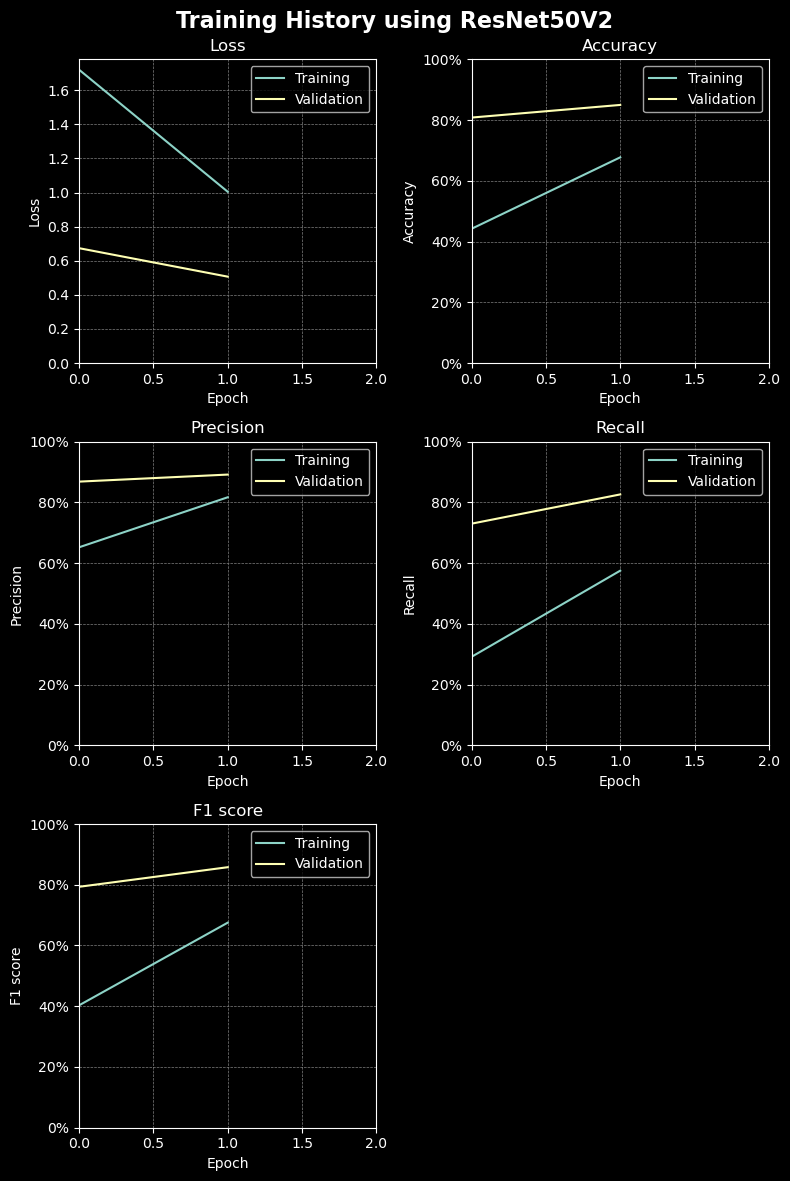

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def training_subplot(hist, metric: str, plotnum: int, lim=None, test_val=None):
    sp = plt.subplot(3, 2, plotnum)
    metric_nm = metric.replace('_', ' ').capitalize()
    plt.plot(hist.history[metric], label='Training')
    plt.plot(hist.history['val_' + metric], label='Validation')

    if test_val is not None:
        test_lbl = 'Test ' + (f'({test_val:.1%})' if lim == 1 else f'({test_val:.2f})')
        plt.axhline(y=test_val, label=test_lbl, color='green', linestyle='-')

    plt.xlabel('Epoch')
    plt.ylabel(metric_nm)
    plt.ylim(0, lim)
    plt.xlim(0, len(hist.history['loss']))
    
    if lim == 1:
        sp.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

    plt.legend()
    plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey')
    plt.title(metric_nm)

def plot_training_history(hist, ptm_name, title='Training History'):
    # Assuming that you might have test values (quality scores) elsewhere in your project
    # We'll set `None` for now. If you have test values, replace `None` with those values.
    quality = {
        'loss': None,         # Replace with actual test loss if available
        'accuracy': None,     # Replace with actual test accuracy if available
        'precision': None,    # Replace with actual test precision if available
        'recall': None,       # Replace with actual test recall if available
        'f1_score': None      # Replace with actual test F1 score if available
    }

    # Create the main figure and subplots
    plt.figure(figsize=(8, 12))
    plt.suptitle(f'{title} using {ptm_name}', fontsize=16, fontweight='bold')

    # Plot loss
    training_subplot(hist, 'loss', 1, test_val=quality['loss'])

    # Plot accuracy
    training_subplot(hist, 'accuracy', 2, lim=1, test_val=quality['accuracy'])

    # Plot precision (check if precision exists in history)
    if 'precision' in hist.history:
        training_subplot(hist, 'precision', 3, lim=1, test_val=quality['precision'])

    # Plot recall (check if recall exists in history)
    if 'recall' in hist.history:
        training_subplot(hist, 'recall', 4, lim=1, test_val=quality['recall'])

    # Plot F1 score (check if F1 score exists in history)
    if 'f1_score' in hist.history:
        training_subplot(hist, 'f1_score', 5, lim=1, test_val=quality['f1_score'])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Example call after training:
plot_training_history(history, 'ResNet50V2')


**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.1. <a id='toc1_4_2_1_1_'></a>[**Thing A.A**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.2. <a id='toc1_4_2_1_2_'></a>[**Thing A.B**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.3. <a id='toc1_4_2_1_3_'></a>[**Thing A.C**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.4. <a id='toc1_4_2_1_4_'></a>[**Thing A.D**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### 1.4.3. <a id='toc1_4_3_'></a>[**Part 3**](#toc0_) [&#8593;](#toc0_)

#### 1.4.3.1. <a id='toc1_4_3_1_'></a>[**Thing A**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.2. <a id='toc1_4_3_2_'></a>[**Thing B**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.1. <a id='toc1_4_3_2_1_'></a>[**Thing B.A**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.2. <a id='toc1_4_3_2_2_'></a>[**Thing B.A**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.3. <a id='toc1_4_3_2_3_'></a>[**Thing B.C**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.4. <a id='toc1_4_3_2_4_'></a>[**Thing B.D**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.3. <a id='toc1_4_3_3_'></a>[**Thing C**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.4. <a id='toc1_4_3_4_'></a>[**Thing D**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]